In [2]:
import sys

import numpy as np
import matplotlib.pyplot as plt


sys.path.insert(1, "..")
from packages.Levy_processes import *
from packages.basicDistributionFunctions import *
from packages.fractional_stable_motion import *
from packages.ou_simulation import *



In [3]:
Image_width = 10

In [4]:
a = -2
b =  2

T = 10 ** 2
M = 10 ** 2
N = 10 ** 3

dt = T / N

alpha_ = [0.5, 1, 1.5, 2]
beta_ = [-1, -0.5, 0, 0.5, 1]


In [5]:
tau_BM = exit_times(Levy_processes(T, M, N, 2, 0), a, b, dt)
tau_FB03 = exit_times(integral_form_simulation(H = 0.3, alpha = 2, beta = 0, N_trajectories = M, dt = dt, time_horizon = T)[1], a, b, dt)
tau_FB07 = exit_times(integral_form_simulation(H = 0.7, alpha = 2, beta = 0, N_trajectories = M, dt = dt, time_horizon = T)[1], a, b, dt)
taus = []

for alpha in alpha_:
    for beta in beta_:
        taus.append(exit_times(Levy_processes(T, M, N, alpha, beta), a, b, dt))



Text(0, 0.5, 'Exit time')

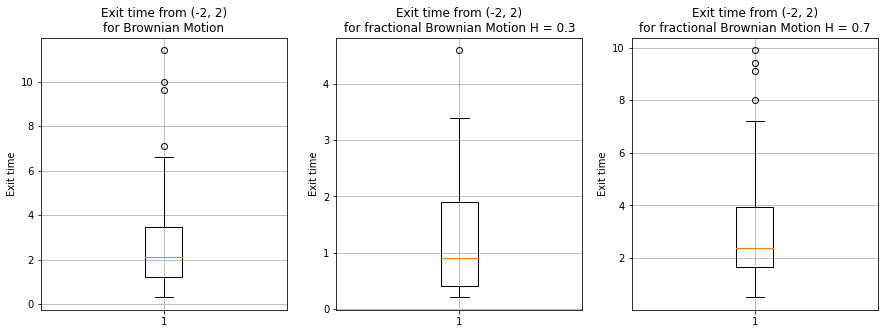

In [21]:
fig, axs = plt.subplots(ncols = 3, figsize = (1.5 * Image_width, 0.5 * Image_width))
ax = axs[0]
ax.boxplot(tau_BM);
ax.set_title(f"Exit time from ({a}, {b})\nfor Brownian Motion")
ax.grid(True)
ax.set_ylabel("Exit time")

ax = axs[1]
ax.boxplot(tau_FB03);
ax.set_title(f"Exit time from ({a}, {b})\nfor fractional Brownian Motion H = 0.3")
ax.grid(True)
ax.set_ylabel("Exit time")

ax = axs[2]
ax.boxplot(tau_FB07[~np.isnan(tau_FB07)]);
ax.set_title(f"Exit time from ({a}, {b})\nfor fractional Brownian Motion H = 0.7")
ax.grid(True)
ax.set_ylabel("Exit time")

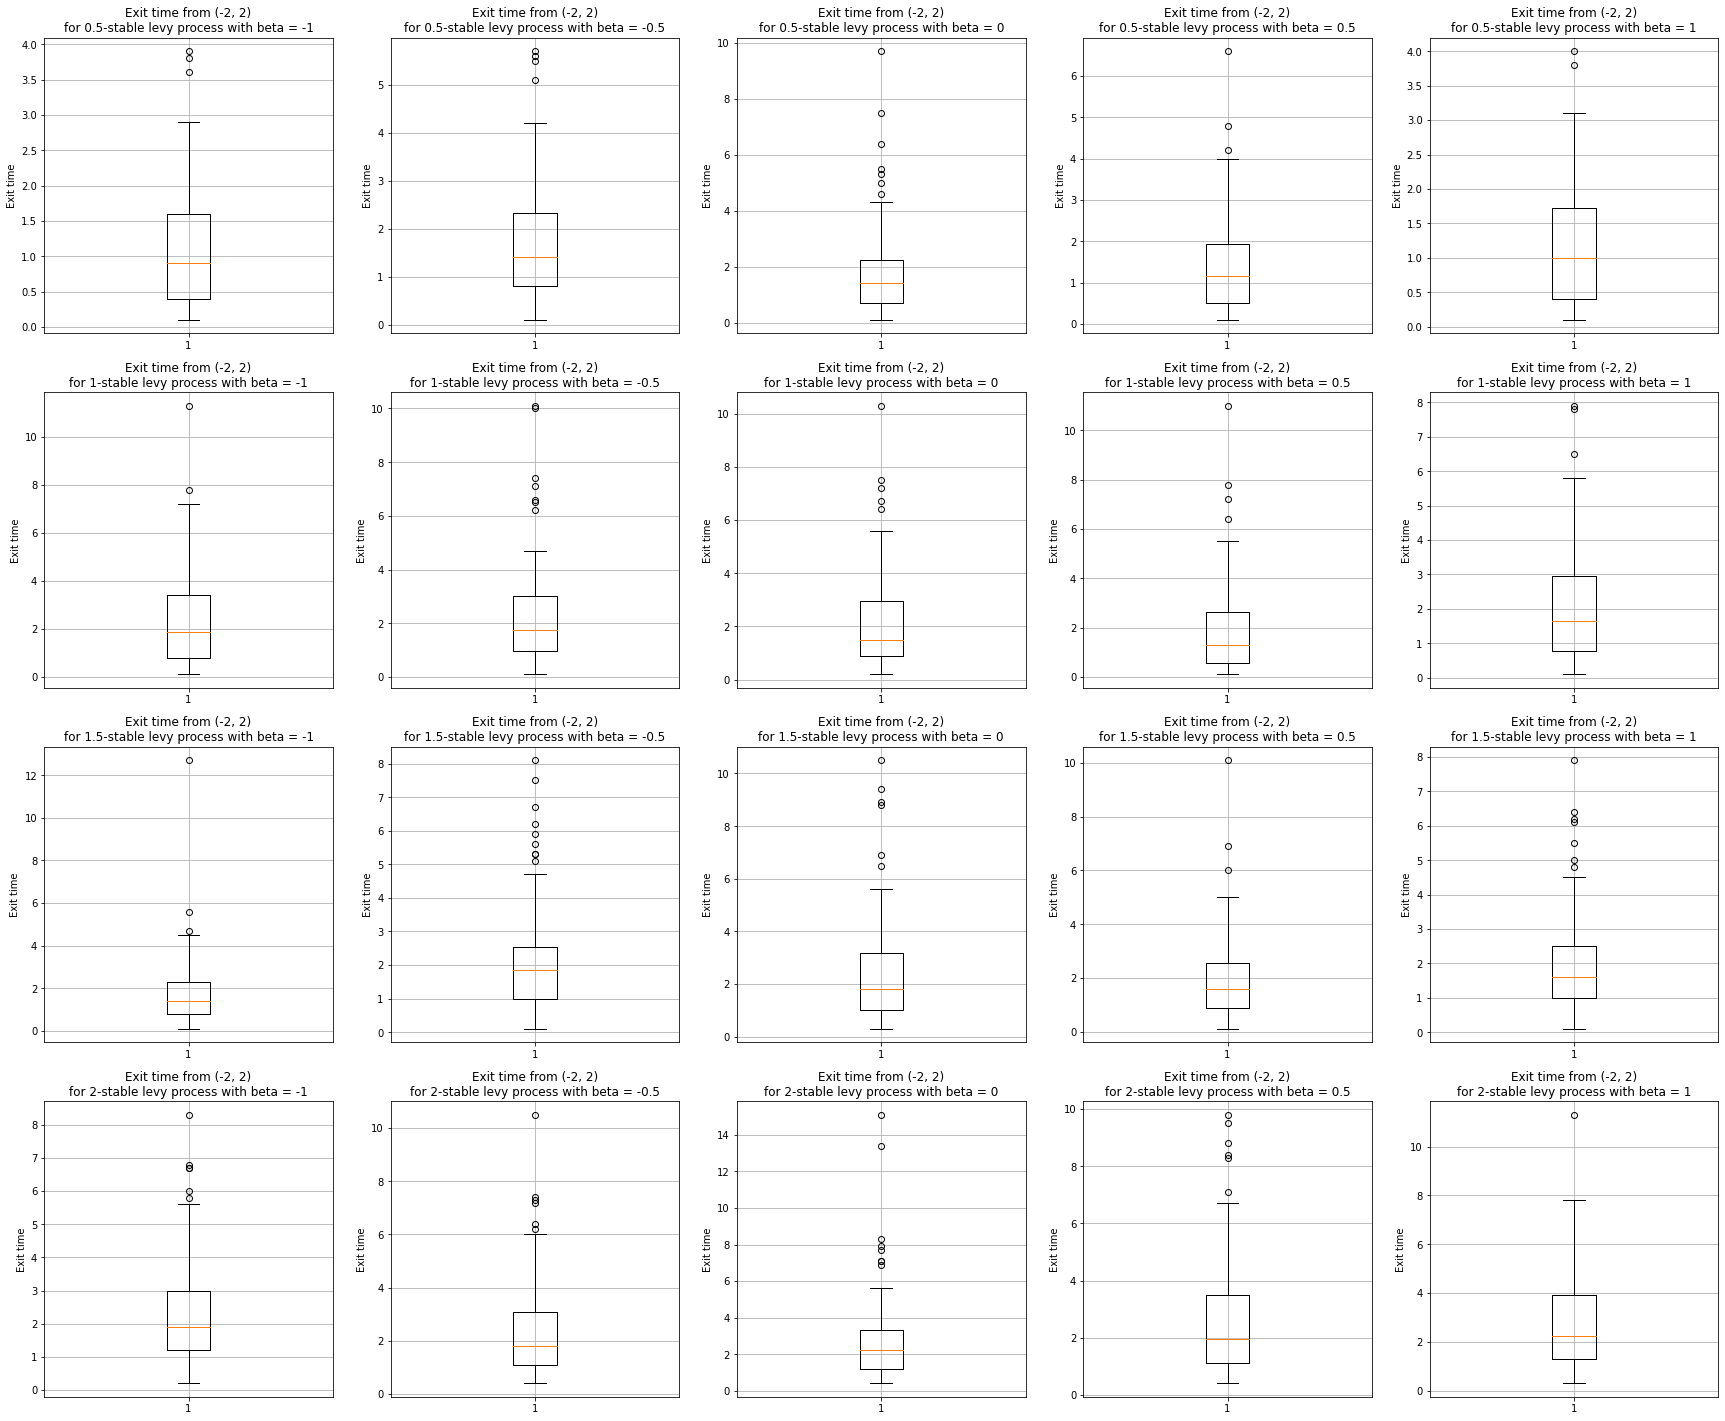

In [18]:
fig, axs = plt.subplots(ncols = len(beta_), nrows = len(alpha_), figsize = (3 * Image_width, 2.5 * Image_width))
k = 0
for i, alpha in enumerate(alpha_):
    for j, beta in enumerate(beta_):
        ax = axs[i][j]
        tau = taus[k]
        k += 1
        ax.boxplot(tau[~np.isnan(tau)]);
        ax.set_title(f"Exit time from ({a}, {b})\nfor {alpha}-stable levy process with beta = {beta}")
        ax.grid(True)
        ax.set_ylabel("Exit time")
